## Image processing - filters

This exercise sheet is based on the "Synchrotron techniques for materials characterization" lecture. By going through this jupyter notebook and filling in the blanks you will learn how to assess basic properties of your image, perform simple image operations, assess the image quality quantitatively and apply a mean template filter.

The example code and solutions were created by André Lopes Marinho and Berit Zeller-Plumhoff.

### Loading required libraries

You will require the following libraries. If loading any of them fails, please use pip install to install any missing libraries.

In [1]:
# Importing libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
import skimage
from skimage import draw

### Loading images and basic properties

The first task will be to write a function that will automatically load and display an image based on the image path that will be provided as an argument to the function.

Please fill in the missing lines as indicated in the comments to load the image.

In [2]:
# Jupyter Magic Command that will ensure our images display in our Jupyter 
# document with pixel information that will help us to run commands more efficiently
%matplotlib widget 

def load_and_show_image(path):
    """Loads and shows an image given a defined path.

    Args:
        path(string): String containing path for images with proper file extension. 
            Example: "images/*.tif"

    Returns: 
        numpy.ndarray: Array with image defined in path.
    """
    
    # We will use the skimage library to read our image
    # use the iio.imread function to read in the image and use matplotlib to display in in greyscale
    image = iio.imread(uri=path)
    plt.imshow(image, cmap='gray')
    print(path + ' was loaded successfully.')
    
    return image

Once the image is loaded, we can assess it shape using the .shape command and the type of the image using the .dtype command. Find out what values the commands returns based on different example images that are provided in the test_images folder.

test_images/A1_test.png was loaded successfully.
(763, 759)
uint8


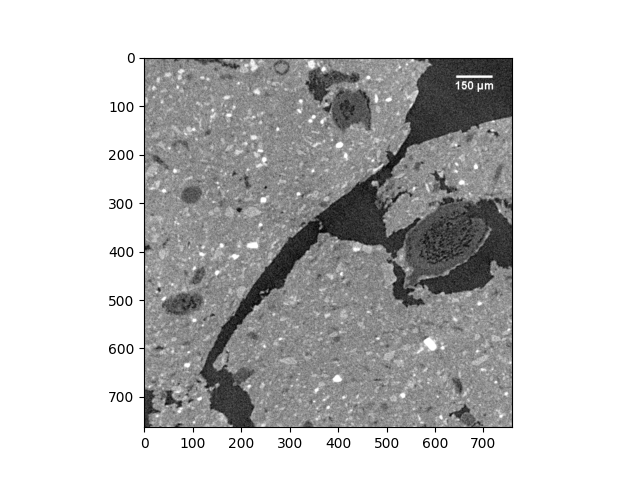

In [3]:
%matplotlib widget 

# load the image
img = load_and_show_image(path='test_images/A1_test.png')

# try to assess the shape and type of the image
print(img.shape)
print(img.dtype)

Write a short function that prints the image type, height, width and number of channels for any given input image.

In [4]:
def print_image_props(image):
    """Displays image type, height, width and number of channels given an image.

    Args:
        image(variablename): variable name of an image
    """
    # The method 'iio.imread' returns an numpy.ndarray, so we can perform array operations on the variable
    # 'image', like showing the number of channels/depth of the image.
    image_shape = image.shape
    image_type = image.dtype
    
    # With this information, we can also print some image properties
    # fill in the information that should be printed
    if len(image_shape) > 2:
        print('Type =', image_type)
        print('Height =', image_shape[0])
        print('Width =', image_shape[1])
        print('# of channels =', image_shape[2])
    else:
        print('Type =', image_type)
        print('Height =', image_shape[0])
        print('Width =', image_shape[1])
        print('# of channels =', 1)

In [5]:
# load an image and print its properties
path='test_images/bone_16bit.png'
img = load_and_show_image(path)
print_image_props(img)

test_images/bone_16bit.png was loaded successfully.
Type = uint16
Height = 1078
Width = 1078
# of channels = 1


### Histogram

In addition to assessing the general image properties, we are usually interested in knowing the greyscale distribution, i.e. the histogram, which gives us a first impression of image quality in terms of contrast and segmentability.

In this following code snipped complete the function to evaluate and the histogram of an image that is input into the function as a numpy.ndarray.

In [6]:
def show_histogram(image):
    """Showns an histogram given an image. This method considers the image will be
        either grayscale or RGB

    Args:
        img(numpy.ndarray): Image represented by array

    Returns: 
        None
    """
    
    # First, we need to know if the image is grayscale or RGB
    # use the shape function to do so
    image_shape = image.shape
    image_type = image.dtype
    
    # Next, we can define some properties of our histogram figure
    # create an empty figure using matplotlib with title, xlabel, ylabel and set the limits of the x-axis
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Pixel count")
    plt.xlim([0, np.max(image)])
    
    # Finally, create a histrogram using the numpy histogram function and plot it
    # use a bin number of 256 in all cases
    if len(image_shape) > 2:
        colors = ("red", "green", "blue")
        for (channel_id, color) in enumerate(colors):
            histogram, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, np.max(image[:, :, channel_id])))
            plt.plot(bin_edges[0:-1], histogram, color=color)
    else:
        histogram, bin_edges = np.histogram(image, bins=256, range=(0,np.max(image)))
        plt.plot(bin_edges[0:-1], histogram)  
        
    return None

Now load a couple of test images and display their histogram using the functions you have adapted.

test_images/bone_16bit.png was loaded successfully.


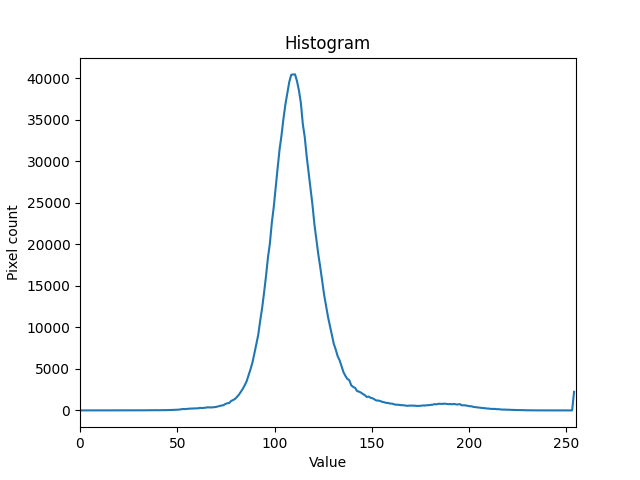

In [7]:
%matplotlib widget 

# Load an image and show its histogram
img = load_and_show_image(path='test_images/bone_16bit.png')
show_histogram(image=img)

### Simple image operations

Once we are able to load an image and assess its properties as well as its histogram, we can perform a number of matrix operations on it.

As shown as an example in the lecture, perform the following operation for the image $A$: $$A_{new}=\frac{A}{4}+100$$ (make sure that the matrix dimensions fit).

Use both the "bone_16bit.png" image and the "A1_test.png" image as input. Comment on how the image operation has changed the original image in both cases.

test_images/A1_test.png was loaded successfully.
Type = float64
Height = 763
Width = 759
# of channels = 1


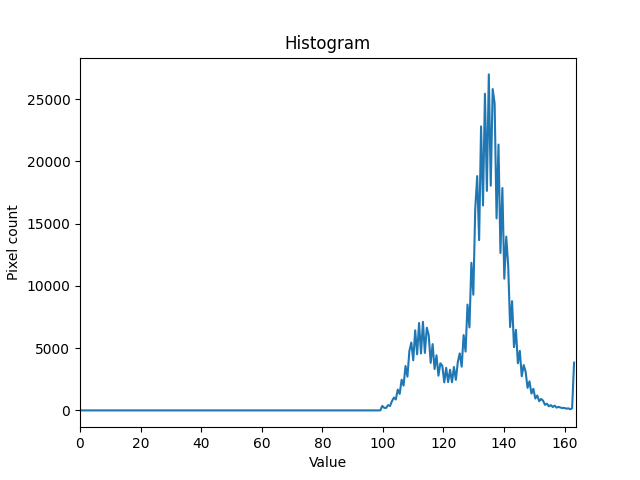

In [8]:
%matplotlib widget 

# load the image
img = load_and_show_image(path='test_images/A1_test.png')

# perform the operation
img_new = (img / 4) + 100 * np.ones((img.shape))

# show the image and print the properties and show the histogram
plt.imshow(img_new, cmap='gray')
print_image_props(img_new)
show_histogram(image=img_new)

Similarly, as shown in the lecture perform the operation $$A_{new}=A*2$$

Type = uint8
Height = 763
Width = 759
# of channels = 1


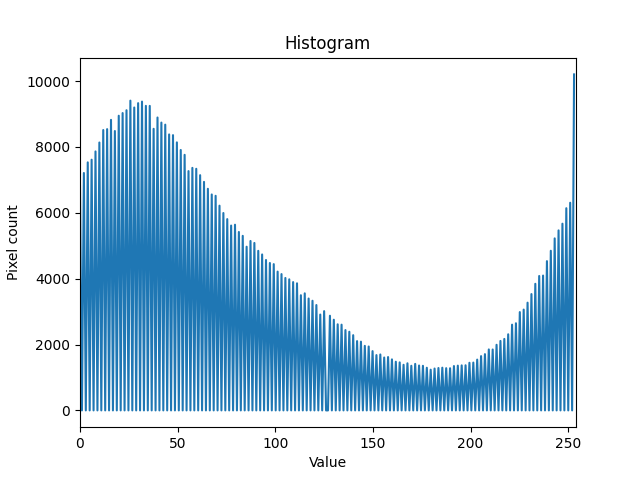

In [9]:
%matplotlib widget 

# perform the operation
img_new = (img *2)

# show the image and print the properties and show the histogram
plt.imshow(img_new, cmap='gray')
print_image_props(img)
show_histogram(image=img_new)

In addition to adding or multiplying an image with scalars, we can add/subtract/multiply/divide images. This is a task performed often for example during the flat and dark field correction of projections prior to the 3D reconstruction of images.

In the next task, please perform this correction of the projection "proj.png" in the test_images folder. In the same folder you will find the corresponding "dark" and "flat" image. Compare how the histogram of the projection changes due to the correction and comment on this based on what you observe qualitatively in the image.

In [10]:
# flat and dark fiel corrections
# load required images

%matplotlib widget 

flat = load_and_show_image(path='test_images/flat.tiff')
dark = load_and_show_image(path='test_images/dark.tiff')
proj = load_and_show_image(path='test_images/proj.tiff')

test_images/flat.tiff was loaded successfully.


test_images/dark.tiff was loaded successfully.
test_images/proj.tiff was loaded successfully.


In [11]:
# perform correction operation and display the result
%matplotlib widget 

proj_corr=(proj-dark)/(flat-dark)
plt.imshow(proj_corr, cmap='gray')

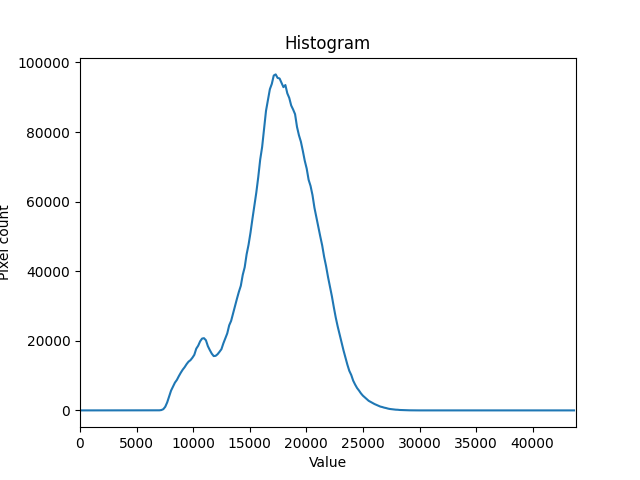

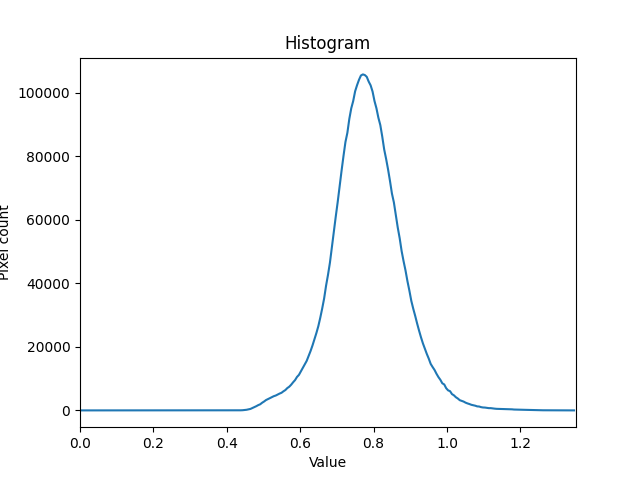

In [12]:
# show the histogram of the original and the corrected projection
%matplotlib widget 

show_histogram(image=proj)
show_histogram(image=proj_corr)

### Image quality

In addition to assessing the image histogram, we want to assess the image quality quantitatively. We can do so by calculating the signal-to-noise ratio (SNR) and contrast-to-noise ratio (CNR) for different regions of our image. In the following, you need to add missing code to two functions which will compuate SNR and CNR following the input of two image regions, respectively. We choose the following definitions of SNR and CNR: $$SNR = \frac{S_i}{0.5\sqrt{\sigma_i^2+\sigma_{bg}^2}}$$ and $$CNR = \frac{|S_i-S_j|}{0.5\sqrt{\sigma_i^2+\sigma_j^2}}$$
where $S_i$ and $S_j$ are the mean greyscale values of the regions $i$ and $j$ and the respective $\sigma$ the standard deviation of the greyscale values. For the SNR we attain the overall noise by taking into account the background noise too.

In [13]:
def get_signal_to_noise_ratio(region_i, region_bg):
    """Calculates Signal-to-Noise Ratio (SNR) by the following expression:
    
                SNR = |mean(region_i)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_bg)^2)]                  
                 
    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining background region
    Returns: 
        double: SNR value
    """
    
    # calculate the mean value of region_i
    a = # add equation
    # calculate the denominator of the SNR
    b = # add equation
    
    # compute and return the SNR
    SNR = a / b
    
    return SNR


def get_contrast_to_noise_ratio(region_i, region_j):
    """Calculates Contrast-to-Noise Ratio (CNR) by the following expression:
    
                CNR = |mean(region_i) - mean(region_j)| / 0.5*[sqrt(stdev(region_i)^2 + stdev(region_j)^2)]                  
                 
    Args:
        region_i(numpy.ndarray): Array slice defining region i
        region_bg(numpy.ndarray): Array slice defining region j
    Returns: 
        double: CNR value
    """
    
    # calculate the numerator of the CNR
    a = # add equation
    # calculate the denominator of the CNR
    b = # add equation
    
    # compute and return the CNR
    CNR = a / b
    
    return CNR

SyntaxError: invalid syntax (2547714289.py, line 14)

Based on the functions you have just created please calculate both SNR and CNR between the four quadrants of the image SNR_CNR.tif in the folder test_images. Overall, you should create four or six comparisons for SNR and CNR, respectively. To calculate the SNR you may assume that the darkest image quadrant is the background.

In order to use the functions you must identify the regions within the image. Identify the image dimensions to do so.

In [ ]:
# load and display the image

%matplotlib widget 

# load image

# print image properties

In [ ]:
# define four regions based on the image and its dimensions
%matplotlib widget 


In [ ]:
# calculate all SNR and CNR

# print the computed values
# SNR

# CNR


Please comment on the values that you have obtained.

In the next task, use image "A1_test2.png" and calculate the CNR for root vs. soil, root vs. background and soil vs. background. Please comment on why you are selecting specific regions and comment on your results.

In [ ]:
%matplotlib widget 

# load image

# check image properties

In [ ]:
# Select different regions from the image and calculate SNR and CNR values

# Regions
air = earth[75:100,185:210]# define region 
soil = # define region 
root = # define region 

# Visualizing them on the image

img_aux = earth.copy()

row_air, col_air = skimage.draw.rectangle_perimeter(start=(75, 185), end=(100, 210))
row_soil, col_soil = skimage.draw.rectangle_perimeter(start=(75, 110), end=(100, 135))
row_root, col_root = skimage.draw.rectangle_perimeter(start=(55, 70), end=(75, 90))

# For better vizualization

fig, ax = plt.subplots()
ax.imshow(img_aux, cmap = 'gray')
ax.plot(col_air, row_air, '-r')
ax.plot(col_soil, row_soil, '-g')
ax.plot(col_root, row_root, '-b')

# Calculate CNR

# CNR - Soil and Root 
CNR1 = # compute
print('CNR soil vs. root: ', np.round(CNR1))

# CNR - Soil and Air
CNR2 = # compute
print('CNR soil vs. air: ', np.round(CNR2,2))

# CNR - Air and Root 
CNR3 = # compute
print('CNR air vs. root: ', np.round(CNR3,2))

### Image filters

If the image quality that we have determined is insufficient, e.g. if the CNR is particularly low, we can apply filters to improve the noise level while maintaining the sharpness of the features we are interested in. To do so, you will complete a function that defines a mean filter which is applied as a quadratic kernel template to the image. The function takes the original image and the filter kernel size as input and outputs the filtered image. You can move the template across the image in a scanning manner - in order to adjust for the edges correctly, you should apply a zero padding at the image borders.

In [ ]:
def mean_filter(image, filter_size):
    """Applies mean filter to a given image.
                 
    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Size of kernel
    Returns: 
        numpy.ndarray: Filtered image
    """
    
    temp = []
    padding = filter_size // 2
    img_final = np.zeros((image.shape))
    
    # create an auxiliary image that is an enlarged copy of the original based on the required padding.
    img_aux= # add
 
    # move the template across the image and save the values of the template in the value temp that is then evaluated
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp= # save template entries
            img_final[i][j] = # apply mean
            
    return img_final

Apply the filter to the image "A1_test2.png" with different kernel sizes and plot both the original and the filtered image next to each other.

In [ ]:
### %matplotlib widget 

# Mean filter
img_mean = # apply filter

# Plot your results to compare each one
# plot the original image and the filtered image next to each other

Finally, compute the CNR again for the regions your defined on the image previously and comment on how a mean filter with kernel size 3 has changed the CNR values.

In [ ]:
# Select different regions from the image and calculate SNR and CNR values

# Regions
air2 = # define region 
soil2 = # define region 
root2 = # define region 

# Visualizing them on the image

img_aux = img_mean.copy()

row_air, col_air = skimage.draw.rectangle_perimeter(start=(75, 185), end=(100, 210))
row_soil, col_soil = skimage.draw.rectangle_perimeter(start=(75, 110), end=(100, 135))
row_root, col_root = skimage.draw.rectangle_perimeter(start=(55, 70), end=(75, 90))

# For better vizualization

fig, ax = plt.subplots()
ax.imshow(img_aux, cmap = 'gray')
ax.plot(col_air, row_air, '-r')
ax.plot(col_soil, row_soil, '-g')
ax.plot(col_root, row_root, '-b')

# Calculate CNR

# CNR - Soil and Root 
CNR1_mean = #
print('CNR soil vs. root after filtering: ', np.round(CNR1_mean,2))

# CNR - Soil and Air
CNR2_mean = #
print('CNR soil vs. air after filtering: ', np.round(CNR2_mean,2))

# CNR - Air and Root 
CNR3_mean = #
print('CNR air vs. root after filtering: ', np.round(CNR3_mean,2))

In addition to the mean filter, we are interested in using the median and Gaussian filter. Write two functions that will apply the respective filter and output the filtered image, given a certain input image and kernel size.

In [ ]:
%matplotlib widget
def median_filter(image, filter_size):
    """Applies median filter to a given image.
                 
    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Size of kernel
        
    Returns: 
        numpy.ndarray: Filtered image      
    """
    
           
    return img_final

In [ ]:
%matplotlib widget
def gaussian_filter(image, filter_size, sigma):
    """Applies median filter to a given image.
                 
    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Size of kernel
        sigma(double): Standard deviation for Gaussian distribution
        
    Returns: 
        numpy.ndarray: Filtered image      
    """
    
               
    return img_final

Apply the filters you have implemented so far to A1_test2.png using different filter parameters and comment on how the result changes and how the filters compare.

#### Fourier filters

In addition to the above filters, applying a Fourier filter, e.g. either a high-, low- or a bandpass filter can be very useful in order to highlight edges or smoothen the image. In the following, you should write three functions that will apply the different kinds of Fourier filters given an input image and the filter parameters.

Start by loading and displaying A1_test2.png - we will be working with this image in the following.

In [ ]:
%matplotlib widget
image = load_and_show_image(path='test_images/A1_test2.png')

We will begin by applying a highpass filter - you will be required to use the image and the filter size as input to your function. Apply the 2d Fourier transform from numpy to your image and shift the resulting spectrum to the center of the image. You should then create a circular mask based on the filter size that sets all low frequencies, i.e. those in the center of the Fourier spectrum, to zero. Then perform the inverse Fourier operations (shifting the spectrum back first).

Plot the original image, the magnitude spectrum, the highpass filter mask and the image after filtering next to each other.

In [ ]:
def fft_highpass_filter(image, filter_size):
    """Applies highpass Fourier filter to a given image.
                 
    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Number of frequency-equivalent pixels to remove
        
    Returns: 
        numpy.ndarray: Filtered image      
    """
    # use the numpy 2D Fourier function to transform the input image
    
    
    # shift the spectrmu to the center
    

    # draw a cylindrical mask using the filter size to filter out the low frequencies
    
    
    # perform the inverse transform
    

    # Plot the original image, the magnitude spectrum, the highpass filter mask  
    # and the image after filtering next to each other.
    
               
    return img_back

Now use the function you have just defined on the image of the soil and root with different input filter sizes and comment on how the filter influences the image.

Next, define a function for a low-pass Fourier filter. Do the same as above, but maintain the low frequencies this time.

In [ ]:
def fft_lowpass_filter(image, filter_size):
    """Applies lowpass Fourier filter to a given image.
                 
    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size(numpy.ndarray): Number of frequency-equivalent pixels to remove
        
    Returns: 
        numpy.ndarray: Filtered image      
    """
                   
    return img_back

Apply the low-pass filter to the image of the soil and root for different input filter sizes and comment on how the image is changed.

Finally, define a Fourier bandpass filter which takes two filter sizes as input for low- and high-frequency thresholds, respectively.

In [ ]:
def fft_bandpass_filter(image, filter_size1, filter_size2):
    """Applies bandpass fourier filter to a given image.
                 
    Args:
        image(numpy.ndarray): Image to be filtered
        filter_size1(numpy.ndarray): Number of frequency-equivalent pixels to remove fp
        
    Returns: 
        numpy.ndarray: Filtered image      
    """
    
               
    return img_back

Apply the bandpass filter to the image of the soil and root for different input filter sizes and comment on how the image is changed.